#RSI, EMA, SMA, & PARABOLIC SAR. BUILD ML BASED LINEAR REGRESSION CHANNEL

DATA FROM NSE WEBSITE : https://drive.google.com/file/d/1b5O4Yk_wLAKb3z2d10RQIq93EQblS5cK/view?usp=sharing

IMPORTING LIBRARIES

In [1]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

In [3]:
# Load the stock price data
df = pd.read_csv('/content/reliance historical.csv')

In [4]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,09-Dec-2020,1993.75,2009.95,2033.8,1999.25,2026.0,2026.95,2019.89,13464375,2.719656e+10,303801,4861192,36.10
1,RELIANCE,EQ,10-Dec-2020,2026.95,2021.60,2028.5,2001.00,2008.0,2007.00,2010.18,7414229,1.490395e+10,212910,2670339,36.02
2,RELIANCE,EQ,11-Dec-2020,2007.00,2013.00,2038.0,1974.25,1999.4,2005.80,2015.50,12434745,2.506219e+10,265002,3553151,28.57
3,RELIANCE,EQ,14-Dec-2020,2005.80,2007.95,2015.0,1986.35,1993.5,1991.30,1997.46,7989830,1.595936e+10,248928,2832392,35.45
4,RELIANCE,EQ,15-Dec-2020,1991.30,1989.70,1989.7,1961.10,1973.6,1974.35,1973.54,8561406,1.689627e+10,240918,3108604,36.31


#TIME SERIES CHART

In [5]:
# Set the date as the index
df.index = pd.to_datetime(df['Date'])

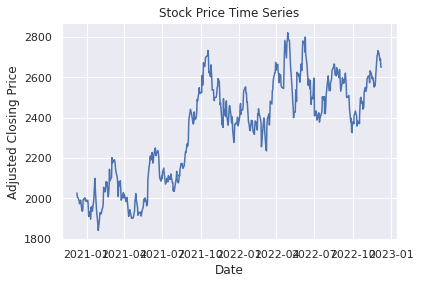

In [6]:
# Plot the time series using seaborn
sns.set(style="darkgrid")
plt.plot(df['Close Price'])
plt.title('Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

In [7]:
# Save the plot as a PNG image file
plt.savefig('Time_Series_Reliance.png')

<Figure size 432x288 with 0 Axes>

#CANDLE STICK CHART

In [8]:
# Create a new DataFrame with the required data for the candlestick plot
df_ohlc = df[['Open Price', 'High Price', 'Low Price', 'Close Price']]
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

<ipython-input-8-3d47944419b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)


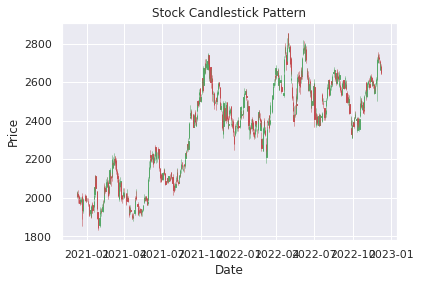

In [9]:
# Create the candlestick plot
fig, ax = plt.subplots()
candlestick_ohlc(ax, df_ohlc.values, width=0.6, colorup='g', colordown='r')
#ax = plt.subplots(figsize=(12, 6))  # Increase the width and height of the plot
ax.set_title('Stock Candlestick Pattern')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis_date()
plt.show()

In [10]:
# Save the plot as a PNG image file
plt.savefig('candle_stick_reliance.png')

<Figure size 432x288 with 0 Axes>

#EMA SMA

In [11]:
# Calculate the EMA and SMA
ema = df['Close Price'].ewm(span=20).mean()
sma = df['Close Price'].rolling(20).mean()

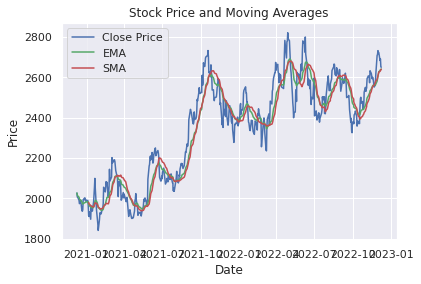

In [12]:
# Plot the EMA and SMA
plt.plot(df['Close Price'], 'b-')
plt.plot(ema, 'g-')
plt.plot(sma, 'r-')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close Price', 'EMA', 'SMA'])
plt.show()

In [13]:
# Save the plot as a PNG image file
plt.savefig('ema_sma_reliance.png')

<Figure size 432x288 with 0 Axes>

#RSI

In [14]:
# Calculate the relative strength (RS)
deltas = df['Close Price'].diff()
up = deltas.copy()
up[up < 0] = 0
down = deltas.copy()
down[down > 0] = 0
rs = up.rolling(14).mean() / down.abs().rolling(14).mean()

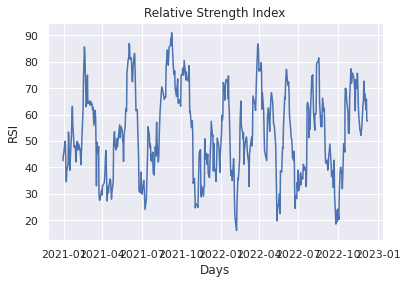

In [15]:
# Calculate the relative strength index (RSI)
rsi = 100.0 - (100.0 / (1.0 + rs))

# Plot the RSI
plt.plot(rsi)
plt.title('Relative Strength Index')
plt.xlabel('Days')
plt.ylabel('RSI')
plt.show()


In [16]:
# Save the plot as a PNG image file
plt.savefig('rsi_reliance.png')

<Figure size 432x288 with 0 Axes>

#PARABOLIC SAR

In [17]:
# Initialize the SAR values
df['SAR'] = df['Close Price'].shift(1)
df['EP'] = df['Close Price'].shift(1)
df['AF'] = 0.02

In [18]:
# Calculate the SAR values
for i in range(1, len(df)):
    # Check that the key exists before accessing it
    if 'Low' in df and 'High' in df:
        if df.loc[i, 'SAR'] < df.loc[i, 'Low']:
            df.loc[i, 'SAR'] = df.loc[i, 'Low']
            df.loc[i, 'EP'] = df.loc[i, 'High']
            df.loc[i, 'AF'] = 0.02
        elif df.loc[i, 'SAR'] > df.loc[i, 'High']:
            df.loc[i, 'SAR'] = df.loc[i, 'High']
            df.loc[i, 'EP'] = df.loc[i, 'Low']
            df.loc[i, 'AF'] = 0.02
        else:
            df.loc[i, 'SAR'] = df.loc[i-1, 'SAR'] + df.loc[i-1, 'AF'] * (df.loc[i-1, 'EP'] - df.loc[i-1, 'SAR'])
            df.loc[i, 'EP'] = max(df.loc[i-1, 'EP'], df.loc[i, 'High'])
            df.loc[i, 'AF'] = min(df.loc[i-1, 'AF'] + 0.02, 0.2)


# Use the SAR values to make predictions on the test data
predictions = df['SAR'].iloc[:19]

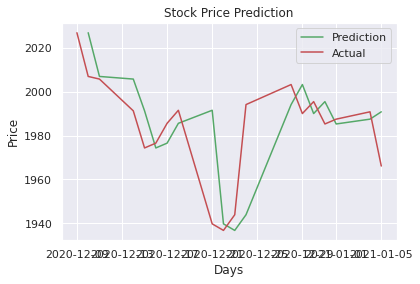

In [19]:
# Plot the predictions and the actual values
plt.plot(predictions, 'g-')
plt.plot(df['Close Price'].iloc[:19], 'r-')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Prediction', 'Actual'])
plt.show()

In [20]:
# Save the plot as a PNG image file
plt.savefig('parabolic_sar_reliance.png')

<Figure size 432x288 with 0 Axes>

#ML MODEL FOR LINEAR REGRESSION CHANNEL

In [21]:
# Train a linear regression model on the data
X = np.arange(len(df)).reshape(-1, 1)
y = df['Close Price']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Calculate the regression line and the upper and lower bounds
regression_line = model.predict(X)
upper_bound = regression_line + 2 * df['Close Price'].std()
lower_bound = regression_line - 2 * df['Close Price'].std()

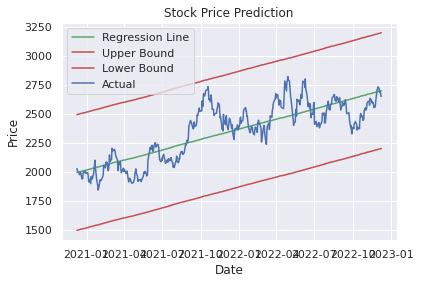

In [23]:
# Plot the regression line and the bounds
plt.plot(df.index, regression_line, 'g-')
plt.plot(df.index, upper_bound, 'r-')
plt.plot(df.index, lower_bound, 'r-')
plt.plot(df['Close Price'], 'b-')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Regression Line', 'Upper Bound', 'Lower Bound', 'Actual'])
plt.show()

In [24]:
# Save the plot as a PNG image file
plt.savefig('lrc_reliance.png')

<Figure size 432x288 with 0 Axes>